**Описание работы.**

Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.

Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.

Нам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.

Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят).

**Содержание**

[Разведочный анализ данных](#sectionEDA)  
1. [Общая информация](#section1)  
    1.1. [Набор данных](#section11)  
    
2. [Работа с данными](#section2)  
    2.1. [Знакомство с датасетом](#section21)  
    2.2. [Изучение пропущенных данных](#section22)  
    2.3. [Изучение состава всех столбцов](#section23)  
    2.4. [Статистический анализ данных](#section24)  
    2.4.1. [Вероятностное распределение каждого столбца](#section241)  
    2.4.2. [А/В тестирование](#section242)  
    2.5. [Распределение средних каждой группы студентов](#section25)  
    2.6. [Исследование вляиния пола и степени подготовленности к тесту на оценки по дисциплинам](#section26)  
    2.6.1. [Исследование по математике](#section261)  
    2.6.2. [Исследование по чтению](#section262)  
    2.6.3. [Исследование по письму](#section263)  
    2.7. [Исследование влияния этнической принадлежности и уровня образования родителей на оценки по дисциплинам](#section27)   
    2.8. [Исследование влияния столового питания на оценки по дисциплинам](#section28) 

[Вывод](#sectionCONCLUSION)

In [372]:
# импортируем нужные библиотеки
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
##pd.set_option('display.max_rows', None)
import math
from scipy import stats
from scipy.stats import skew, norm
import itertools

import matplotlib.pyplot as plt
import matplotlib
palette = plt.get_cmap('Set2')
import seaborn as sns
plt.style.use('seaborn-darkgrid')
##%matplotlib inline
import missingno as msno
import plotly.express as px

from datetime import datetime, timedelta
import os

import warnings
warnings.filterwarnings("ignore")

# Разведочный анализ данных. <a id="sectionEDA"></a>
## 1. Общая информация. <a id="section1"></a>
### 1.1. Набор данных. <a id="section11"></a>

In [373]:
student_perfomance_df = pd.read_csv('StudentsPerformance.csv')

## 2. Работа с данными. <a id="section2"></a>
### 2.1. Знакомство с датасетом. <a id="section21"></a>

In [374]:
student_perfomance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [375]:
student_perfomance_df.shape

(1000, 8)

**Вывод:**  
student_perfomance_df.csv содержит 1000 строк и 7 столбцов:
- gender – пол студента
- race/ethnicity – раса/этническая принадлежность студента
- parental level of education – уровень образования родителей
- lunch – тип столового питания
- test preparation course – стутаус курса подготовки к экзаменам
- math score – оценка по математике
- reading score – оценка по чтению
- writing score – оценка по письму

### 2.2. Изучение пропущенных данных. <a id="section22"></a>

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


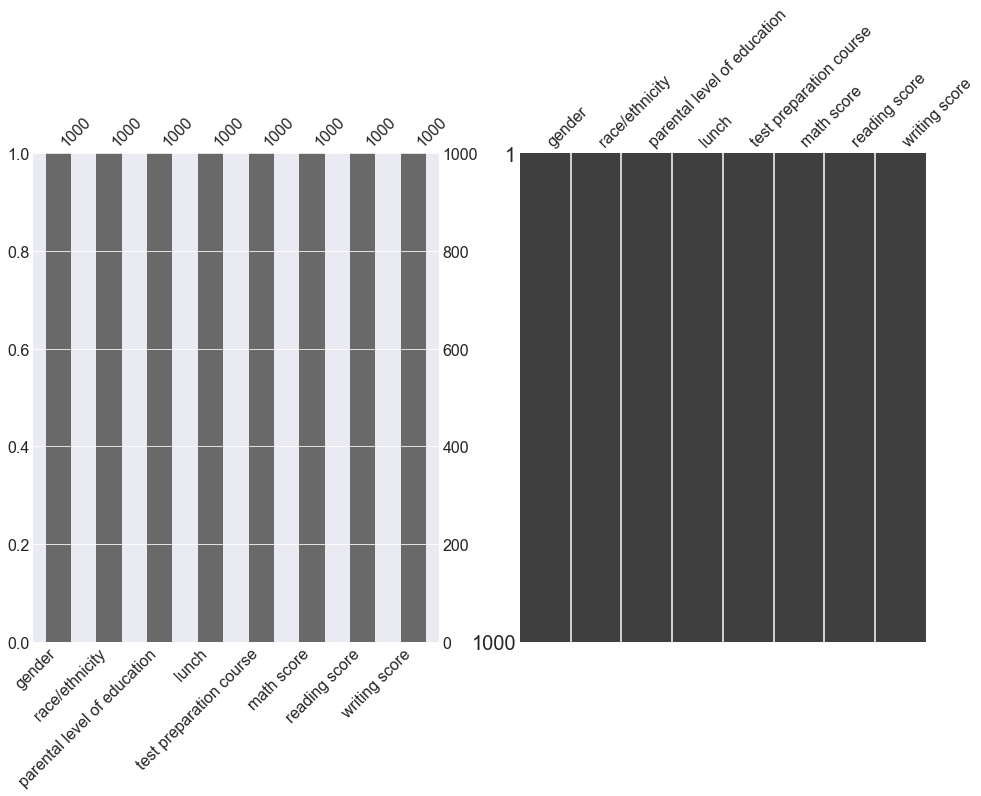

In [376]:
print(student_perfomance_df.isnull().sum())

# создадим один объект Figure и два объекта Axes
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
# теперь отрисуем в axes[0] диаграмму пропущенных значений
msno.bar(student_perfomance_df, figsize=(10, 7), ax=axes[0])
# а в axes[1] отрисуем матрицу пропущенных значений
msno.matrix(student_perfomance_df, figsize=(10, 7), ax=axes[1])
plt.show()

**Вывод:**  
Датасет полный, ни одного пропущенного значения.

### 2.3. Изучение состава всех столбцов. <a id="section23"></a>

In [377]:
print(student_perfomance_df.dtypes)
# метод describe для числовых данных
print(student_perfomance_df.describe(include=[np.number]))
# метод describe для текстовых данных
print(student_perfomance_df.describe(include=[np.object]))

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C        

In [378]:
# глянем на уникальные данные каждого столбца
for column in student_perfomance_df.columns:
    print('Уникальные значения столбца {}:\n{}'.format(column, np.sort(student_perfomance_df[column].unique())))

Уникальные значения столбца gender:
['female' 'male']
Уникальные значения столбца race/ethnicity:
['group A' 'group B' 'group C' 'group D' 'group E']
Уникальные значения столбца parental level of education:
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
Уникальные значения столбца lunch:
['free/reduced' 'standard']
Уникальные значения столбца test preparation course:
['completed' 'none']
Уникальные значения столбца math score:
[  0   8  18  19  22  23  24  26  27  28  29  30  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100]
Уникальные значения столбца reading score:
[ 17  23  24  26  28  29  31  32  34  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60

In [379]:
# выведем наиболее часто встречающиеся значения в столбцах
for column in student_perfomance_df.columns:
    print('Column name:', column)
    print(student_perfomance_df[column].value_counts().nlargest(5), '\n')

Column name: gender
female    518
male      482
Name: gender, dtype: int64 

Column name: race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64 

Column name: parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
Name: parental level of education, dtype: int64 

Column name: lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64 

Column name: test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64 

Column name: math score
65    36
62    35
59    32
69    32
73    27
Name: math score, dtype: int64 

Column name: reading score
72    34
74    33
64    32
73    30
67    30
Name: reading score, dtype: int64 

Column name: writing score
74    35
70    33
68    31
73    28
62    27
Name: writing score, dtype: int64 



### 2.4. Статистический анализ данных. <a id="section24"></a>
#### 2.4.1. Вероятностное распределение каждого столбца. <a id="section241"></a>

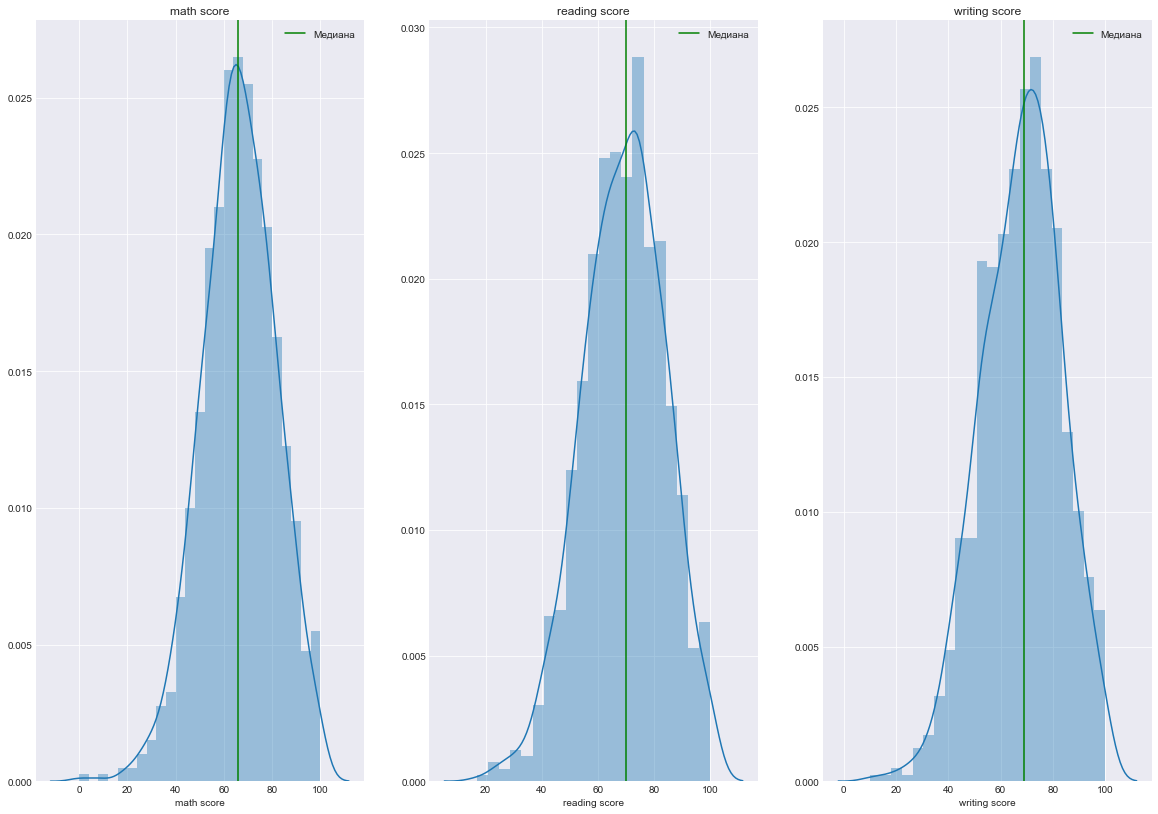

In [380]:
# оставим только столбцы с данными типа int64 и float64
student_perfomance_df_for_dist = student_perfomance_df.loc[:, student_perfomance_df.dtypes!='object']
# а теперь отобразим все на одном графике
fig, axes = plt.subplots(1, len(student_perfomance_df_for_dist.columns), figsize=(20, 14))
for i, column in enumerate(student_perfomance_df_for_dist.columns):
    sns.distplot(student_perfomance_df_for_dist[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].axvline(student_perfomance_df_for_dist[column].median(), c='g', label='Медиана')
    axes[i].legend(loc='best')
plt.show()

**Вывод:**  
- можно сказать, что оценки распределены по нормальному закону;  
- выбросы в данных не наблюдаются;  
- явной кластеризация значений не выявлено.

#### 2.4.2. А/В тестирование. <a id="section242"></a>

Очень часто в экспериментах и исследованиях возникает необходимость сравнить несколько групп между собой. В таком случае мы можем применять однофакторный дисперсионный анализ (ANOVA).

In [381]:
# создадим удобную функцию для выполнения ANOVA
def one_way_ANOVA(samples:list):
    mean_samples = np.mean(np.concatenate(samples))
    samples_means = [np.mean(sample) for sample in samples]
    # SST - total sum of square (общая изменчивость общей выборки)
    sst = sum([sum((sample - mean_samples)**2) for sample in samples])
    # степени свободы при SST
    sst_df = sum([len(sample) for sample in samples]) - 1
    # SSW - sum of square within groups (дисперсия внутри каждой группы)
    ssw = sum([sum((sample - sample_mean)**2) for sample, sample_mean in zip(samples, samples_means)])
    # степени свободы при SSW
    ssw_df = sum([len(sample) for sample in samples]) - len(samples)
    # SSB - sum of square between groups (межгрупповая дисперсия)
    ssb = sum([len(sample)*(sample_mean-mean_samples)**2 for sample, sample_mean in zip(samples, samples_means)])
    # степени свободы при SSB
    ssb_df = len(samples) - 1
    # F-значение
    f_measure = (ssb/ssb_df) / (ssw/ssw_df)
    # вероятность правильности нулевой гипотезы (не путать с p-value)
    p = 1-stats.f.cdf(f_measure, ssb_df, ssw_df)
    return p

Благодаря вычислительным возможностям современных компьютеров для дальнейшего исследования мы без проблем можем охватить всех студентов датасета, а не делать выборки.  

Итак, нулевая гипотеза гласит, что средние разных групп равны, а это значит, что они принадлежат одной популяции. Альтернативная же гипотеза говорит об обратном, средние имеют весомое статистическое различие.

In [382]:
for discipline in ['math score', 'reading score', 'writing score']:
    df = student_perfomance_df[['race/ethnicity', discipline]]
    samples = []
    for group in student_perfomance_df['race/ethnicity'].unique():
        samples += [df[df['race/ethnicity']==group][discipline].to_list()]
    print('Вероятность того, что результаты групп по дисциплине {} имеют статистически значимые различия - {}\n'\
          .format(discipline, 1-one_way_ANOVA(samples)))

Вероятность того, что результаты групп по дисциплине math score имеют статистически значимые различия - 0.9999999999862678

Вероятность того, что результаты групп по дисциплине reading score имеют статистически значимые различия - 0.9998219910896764

Вероятность того, что результаты групп по дисциплине writing score имеют статистически значимые различия - 0.9999890208109299



Заключаем, что эти группы и правда отличаются в каждой из дисциплин. Принимаем альнернативную гипотезу.  

Интересно будет посмотреть на ANOVA пары групп студентов, узнать есть ли похожие по результатам две группы студентов, и провести проверку нулевой гипотезы уже между всеми комбинациями только двух групп.

In [383]:
# список всех комбинаций по две группы нашего датасета
group_combinations = list(itertools.combinations(student_perfomance_df['race/ethnicity'].unique(), 2))
group_combinations

[('group B', 'group C'),
 ('group B', 'group A'),
 ('group B', 'group D'),
 ('group B', 'group E'),
 ('group C', 'group A'),
 ('group C', 'group D'),
 ('group C', 'group E'),
 ('group A', 'group D'),
 ('group A', 'group E'),
 ('group D', 'group E')]

In [384]:
for discipline in ['math score', 'reading score', 'writing score']:
    df = student_perfomance_df[['race/ethnicity', discipline]]
    for two_groups in group_combinations:
        samples = []
        samples += [df[df['race/ethnicity']==two_groups[0]][discipline].to_list()]
        samples += [df[df['race/ethnicity']==two_groups[1]][discipline].to_list()]
        print('Вероятность того, что результаты групп {} и {} по дисциплине {} имеют статистически значимые различия - {}\n'\
              .format(two_groups[0], two_groups[1], discipline, 1-one_way_ANOVA(samples)))

Вероятность того, что результаты групп group B и group C по дисциплине math score имеют статистически значимые различия - 0.5352291060832429

Вероятность того, что результаты групп group B и group A по дисциплине math score имеют статистически значимые различия - 0.6496584038340042

Вероятность того, что результаты групп group B и group D по дисциплине math score имеют статистически значимые различия - 0.9951138028628946

Вероятность того, что результаты групп group B и group E по дисциплине math score имеют статистически значимые различия - 0.9999999949920539

Вероятность того, что результаты групп group C и group A по дисциплине math score имеют статистически значимые различия - 0.8895618925441078

Вероятность того, что результаты групп group C и group D по дисциплине math score имеют статистически значимые различия - 0.9841116504439829

Вероятность того, что результаты групп group C и group E по дисциплине math score имеют статистически значимые различия - 0.9999999980727612

Вероят

Альтернативная гипотеза снова не подтверждается во всех случаях.  
**Вывод:**  
- все группы являются представителями разных популяций;  
- результаты тестирования студентов также будут иметь статистическую значимость при сравнении представленных групп студентов.

### 2.5. Распределение средних каждой группы студентов. <a id="section25"></a>

In [385]:
# сгруппируем по группам студентов и вычислим среднее каждой группы
sp_df_group_means = student_perfomance_df[['gender', 'race/ethnicity', 'math score', 'reading score', 'writing score']]\
.groupby('race/ethnicity')\
.agg({'math score': 'mean', 'reading score':'mean', 'writing score':'mean', 'gender':'count'})\
.round(1)\
.rename(columns={'gender':'group_count'})
# добавим столбец'total_mean_score', в котором будет отражена средняя оценка группы по всем 
sp_df_group_means['total_mean_score'] = sp_df_group_means[['math score', 'reading score', 'writing score']].mean(axis=1)
sp_df_group_means.sort_values(by='total_mean_score', ascending=False)

,math score,reading score,writing score,group_count,total_mean_score
race/ethnicity,,,,,
group E,73.8,73.0,71.4,140,72.733333
group D,67.4,70.0,70.1,262,69.166667
group C,64.5,69.1,67.8,319,67.133333
group B,63.5,67.4,65.6,190,65.500000
group A,61.6,64.7,62.7,89,63.000000


**Вывод:**  
- судя по всему алфавитное деление на группы отражает степень подготовки студентов. A - слабая подготовка, E - сильная подготовка.

### 2.6. Исследование вляиния пола и степени подготовленности к тесту на оценки по дисциплинам. <a id="section26"></a>
#### 2.6.1. Исследование по математике. <a id="section261"></a>

In [386]:
student_perfomance_df[['gender', 'test preparation course', 'math score']]\
.groupby(['gender','test preparation course'])\
.agg(['mean','count'])\
.round(1)

math score      
                                     mean count
gender test preparation course                 
female completed                     67.2   184
       none                          61.7   334
male   completed                     72.3   174
       none                          66.7   308

**Вывод:**  
- в математике лучше себя показала мужская половина студентов;
- предварительная подготовка к тесту положительно влияет на его результаты.

#### 2.6.2. Исследование по чтению. <a id="section262"></a>

In [387]:
student_perfomance_df[['gender', 'test preparation course', 'reading score']]\
.groupby(['gender','test preparation course'])\
.agg(['mean','count'])\
.round(1)

reading score      
                                        mean count
gender test preparation course                    
female completed                        77.4   184
       none                             70.0   334
male   completed                        70.2   174
       none                             62.8   308

**Вывод:**  
- в чтении преуспела женская половина студентов;
- предварительная подготовка к тесту также положительно влияет на его результаты.

#### 2.6.3. Исследование по письму. <a id="section263"></a>

In [388]:
student_perfomance_df[['gender', 'test preparation course', 'writing score']]\
.groupby(['gender','test preparation course'])\
.agg(['mean','count'])\
.round(1)

writing score      
                                        mean count
gender test preparation course                    
female completed                        78.8   184
       none                             69.0   334
male   completed                        69.8   174
       none                             59.6   308

**Вывод:**  
- в письме также преуспела женская половина студентов;
- предварительная подготовка к тесту также положительно влияет на его результаты.

### 2.7. Исследование влияния этнической принадлежности и уровня образования родителей на оценки по дисциплинам. <a id="section27"></a>
Составим таблицу показателей.

In [389]:
race_parent_level_sp_df =\
student_perfomance_df[['race/ethnicity', 'parental level of education', 'math score', 'reading score', 'writing score']]\
.groupby(['race/ethnicity', 'parental level of education'])\
.agg('mean')

race_parent_level_sp_df['total score'] = race_parent_level_sp_df[['math score', 'reading score', 'writing score']].mean(axis=1)
race_parent_level_sp_df

math score  reading score  \
race/ethnicity parental level of education                              
group A        associate's degree            61.000000      67.071429   
               bachelor's degree             67.166667      68.083333   
               high school                   60.444444      62.888889   
               master's degree               57.666667      64.666667   
               some college                  63.888889      65.777778   
               some high school              58.916667      62.083333   
group B        associate's degree            66.097561      69.585366   
               bachelor's degree             69.300000      72.950000   
               high school                   59.791667      63.458333   
               master's degree               67.166667      80.166667   
               some college                  63.189189      65.756757   
               some high school              61.815789      66.447368   
group C        associate's degree            66.730769      71.128205   
               bachelor's degree             68.150000      75.675000   
               high school                   60.906250      64.421875   
               master's degree               67.052632      70.526316   
               some college                  65.130435      69.420290   
               some high school              60.551020      65.632653   
group D        associate's degree            67.600000      70.540000   
               bachelor's degree             67.571429      70.142857   
               high school                   62.863636      64.409091   
               master's degree               72.521739      77.173913   
               some college                  68.731343      70.880597   
               some high school              66.760000      69.980000   
group E        associate's degree            74.897436      73.820513   
               bachelor's degree             76.555556      74.833333   
               high school                   70.772727      70.318182   
               master's degree               74.625000      82.125000   
               some college                  73.828571      72.628571   
               some high school              72.111111      69.555556   

                                            writing score  total score  
race/ethnicity parental level of education                              
group A        associate's degree               63.571429    63.880952  
               bachelor's degree                68.333333    67.861111  
               high school                      60.500000    61.277778  
               master's degree                  67.666667    63.333333  
               some college                     65.000000    64.888889  
               some high school                 58.583333    59.861111  
group B        associate's degree               68.243902    67.975610  
               bachelor's degree                71.650000    71.300000  
               high school                      61.250000    61.500000  
               master's degree                  77.166667    74.833333  
               some college                     64.189189    64.378378  
               some high school                 64.605263    64.289474  
group C        associate's degree               70.269231    69.376068  
               bachelor's degree                75.900000    73.241667  
               high school                      61.656250    62.328125  
               master's degree                  69.526316    69.035088  
               some college                     68.869565    67.806763  
               some high school                 63.285714    63.156463  
group D        associate's degree               69.860000    69.333333  
               bachelor's degree                71.892857    69.869048  
               high school                      63.159091    63.477273  
               master's degr

Теперь визуализируем для лучшей интерпретируемости.

In [390]:
plot = px.line_polar(race_parent_level_sp_df.reset_index(),
              r='total score',
              theta='parental level of education',
              color='race/ethnicity', log_r=True,
              line_close=True, width=800, height=500,
              title='Зависимость успеваемости студентов от ученой степени родителей')
plot.show()

**Вывод:**  
- ожидаемо группа Е показывает лучшие результаты, а группа А в аутсайдерах;
- с увеличением ученой степени увеличивается и средний показатель успеваемости студента, но нелинейно, есть отклонение в *high scool*.

### 2.8. Исследование влияния столового питания на оценки по дисциплинам. <a id="section28"></a>

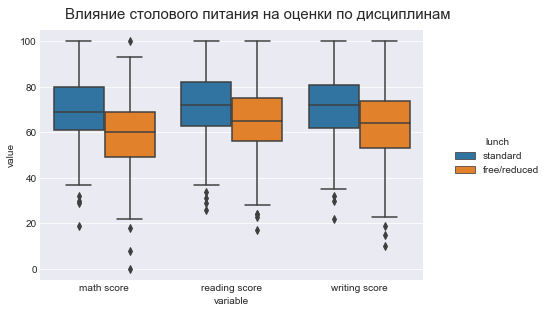

In [391]:
lunch_sp_df = student_perfomance_df[['lunch', 'math score', 'reading score', 'writing score']].melt(id_vars=['lunch'])
cp = sns.catplot('variable', 'value', hue='lunch', kind='box', data=lunch_sp_df, ax=ax)
cp.fig.set_size_inches(8, 4)
cp.fig.suptitle(x=0.5, y=1.05, t='Влияние столового питания на оценки по дисциплинам', size=15)
plt.show()